Que 1: Calculate the current(Iout) for One column Resistor path circuit.

Solution: We can derive the equation of current for this circuit using Ohm's Law;
Each resistor has a Conductance (Gi) = 1/Ri.
Hence, V= IR ; I = V/R ; I = V*G

Since there is no wire resistance for this scenario, total current to ground will simply be summation of V*G for each resistor within the circuit

Therefore, the Equation to the mentioned circuit will be:
Iout = Vin(1)*G(1) + Vin(2)*G(2) + Vin(3)*G(3) + ..... + Vin(n)*G(n)

In this case equation of Iout is same as Ideal VMM


Iout_a: 2.550378e-03 A
I_ideal: 2.550378e-03 A


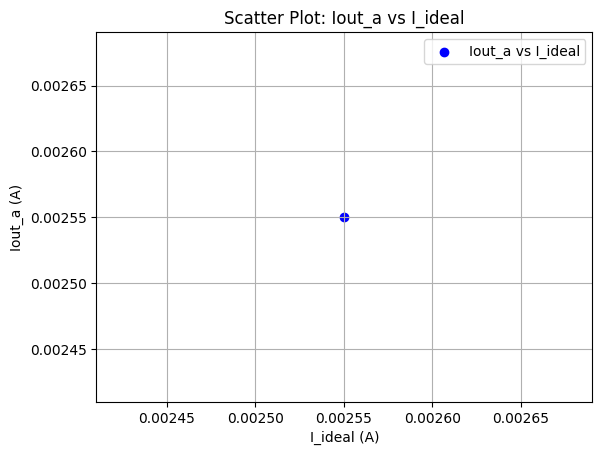

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants as per the design
N = 100  # Number of elements
Vin_min, Vin_max = 0, 1  # Vin range in volts
G_min, G_max = 10e-6, 100e-6  # G range in siemens [0,100µS]

# Generate random Vin and G values
np.random.seed(42)  # For reproducibility
Vin = np.random.uniform(Vin_min, Vin_max, N)  # Vin values (0-1V)
G = np.random.uniform(G_min, G_max, N)  # G values (10-100 µS)

# Calculate Iout_a
Iout_a = np.sum(G * Vin)

# Verification: Calculate I_ideal
I_ideal = np.sum(Vin * G)

# Print results
print(f"Iout_a: {Iout_a:.6e} A")
print(f"I_ideal: {I_ideal:.6e} A")

# Plot Iout_a vs I_ideal
plt.scatter([I_ideal], [Iout_a], color="blue", label="Iout_a vs I_ideal")
plt.xlabel("I_ideal (A)")
plt.ylabel("Iout_a (A)")
plt.title("Scatter Plot: Iout_a vs I_ideal")
plt.legend()
plt.grid(True)
plt.show()



Que 2: Calculate Iout for One column resistor Path circuit same as Que 1, but consider wire resistance of Gwire between each cells.

Solution: We can use the principle as the preivous equation.
I = G*R;
Circuit Conductance: Here, each resistor G(i) is connected with wire of conductance of Gwire.
Total equivalent conductance impacted by conductance of resistor and wire resistor.

Iout_b = Vin/Req
Iout_b = Vin * Geq
Geq = 1/[(1/G1+1/G2+....+1/Gn) + (1/Gwire)]

So, The equation will be:
Iout_b = Vin * {1/[(1/G1+1/G2+....+1/Gn) + (1/Gwire)]}


G_eq: 5.195734e-03 S
Iout_b: 2.442934e-03 A
I_ideal: 2.550378e-03 A


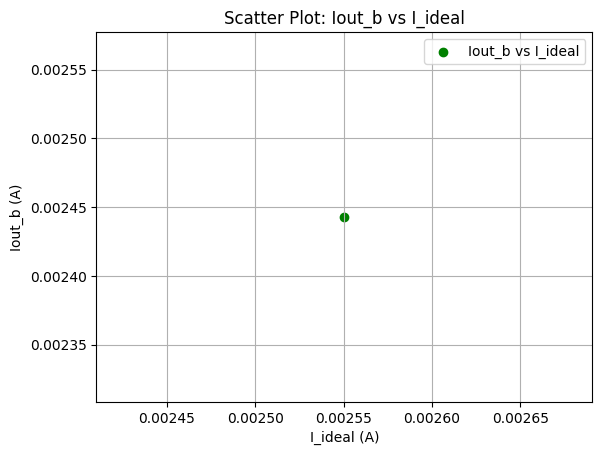

In [7]:
# Constants
G_wire = 0.1  # Wire conductance in Siemens
N = 100 #number of cells
Vin_min, Vin_max = 0, 1  # Vin range in volts
G_min, G_max = 10e-6, 100e-6  # G range in siemens [0,100µS]

# Generate random Vin and G values
np.random.seed(42)  # For reproducibility
Vin = np.random.uniform(Vin_min, Vin_max, N)  # Vin values (0-1V)
G = np.random.uniform(G_min, G_max, N)  # G values (10-100 µS)

# Calculate equivalent conductance
G_sum = np.sum(G)  # Sum of all conductances due to resistor
G_eq = 1 / (1 / G_sum + 1 / G_wire)  # Equivalent conductance

# Calculate Iout_b
Iout_b = G_eq * np.mean(Vin)  # Assuming a single Vin value drives the column

# Verification: Ideal current
I_ideal = np.sum(Vin * G)

# Print results
print(f"G_eq: {G_eq:.6e} S")
print(f"Iout_b: {Iout_b:.6e} A")
print(f"I_ideal: {I_ideal:.6e} A")

# Scatter plot Iout_b vs I_ideal
plt.scatter([I_ideal], [Iout_b], color="green", label="Iout_b vs I_ideal")
plt.xlabel("I_ideal (A)")
plt.ylabel("Iout_b (A)")
plt.title("Scatter Plot: Iout_b vs I_ideal")
plt.legend()
plt.grid(True)
plt.show()


Que 3: Now we are considering two columns, and there is also wire conductance between the two columns. Calculate the 2nd column current to ground Iout_c. G is no longer a vector, but a Nx2 matrix.

1: What will happen if the 1st column is not connected to perfect ground, but instead a ground with voltage offset V_offset, assume V_offset = 0.05 V.

Solution:

For column 1: Conductance of resistor = G[i,0]
              Voltage = Vin[i,0]
For column 2: Conductance of resistor = G[i,1]
              Voltage = Vin[i,1]

Total current is impacted by wire conductance between two columns.

Geq = 1/{[1/summation of G[:;1]] + 1/Gwire}

If column 1 is not connected to perfect ground, Voffset = 0.05V affects the current.
Therefore, The new voltage driving the current in column 2 becomes:
Veff = Vin<2> - Voffset

Hence, Iout_c = Veff * Geq

G_eq_col2: 5.157908e-03 S
Iout_c: 2.578617e-03 A
I_ideal_col2: 2.942444e-03 A


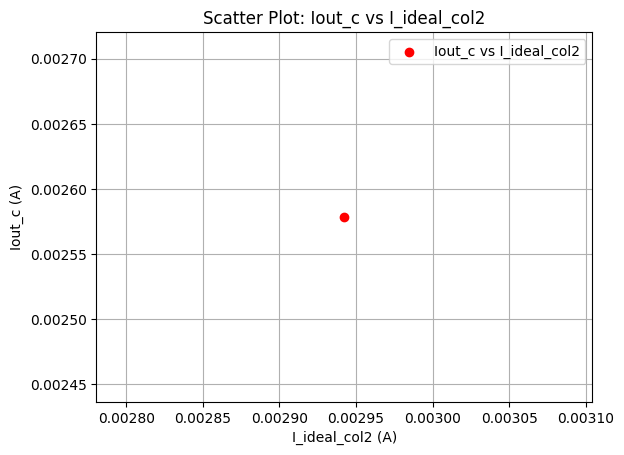

In [8]:
# Constants
V_offset = 0.05  # Voltage offset for the first column
G_wire = 0.1  # Wire conductance in Siemens

# Generate random G and Vin for two columns
G = np.random.uniform(G_min, G_max, (N, 2))  # Nx2 matrix for G
Vin = np.random.uniform(Vin_min, Vin_max, (N, 2))  # Nx2 matrix for Vin

# Effective voltage for the second column
V_eff = Vin[:, 1] - V_offset

# Calculate equivalent conductance for the second column
G_sum_col2 = np.sum(G[:, 1])  # Sum of G values in column 2
G_eq_col2 = 1 / (1 / G_sum_col2 + 1 / G_wire)  # Equivalent conductance for column 2

# Calculate Iout_c
Iout_c = G_eq_col2 * np.mean(V_eff)  # Using mean V_eff to approximate driving voltage

# Verification: Ideal current for column 2
I_ideal_col2 = np.sum(Vin[:, 1] * G[:, 1])

# Print results
print(f"G_eq_col2: {G_eq_col2:.6e} S")
print(f"Iout_c: {Iout_c:.6e} A")
print(f"I_ideal_col2: {I_ideal_col2:.6e} A")

# Scatter plot Iout_c vs I_ideal_col2
plt.scatter([I_ideal_col2], [Iout_c], color="red", label="Iout_c vs I_ideal_col2")
plt.xlabel("I_ideal_col2 (A)")
plt.ylabel("Iout_c (A)")
plt.title("Scatter Plot: Iout_c vs I_ideal_col2")
plt.legend()
plt.grid(True)
plt.show()


Que 4: Calculate the Iout_d for 1T1R cell
 answer the following questions:
 1. Which 1T1R cell type (A or B) helps more to reduce the difference between Iout_d to
 I_ideal? Why?
 2. Whydoes computation complexity increase when we change cells from perfect resistor
 to 1T1R cell?
 3. If you have more time, how will you solve this problem numerically? You don't have to
 consider transistor gate control

Solution:

Each 1T1R cell consists of a transistor that introduces non-linear behavior and a resistor which is in series with transistor. So current will be impacted by both these non-linear and serial resistor conductance

Transistor current(I): for NMOS transistor in saturation;
It=K(Vgs-Vth)^2, if Vgs >Vth; Vgs = Voltage across gate to source , Vth= thershold voltage of transistor

Resistor current(Ir) = Vcell/R
Total I in cell = It + IR

Iout_d can be eqaluated using KCL;

Iout_d = Summation of Icell(i), where i = 1 to N

Iout_d = Summation of {K(Vgs(i) - Vth)^2 + Vcell(i)/R} , where i = 1 to N

Following code implements this equation.

In [10]:
from scipy.optimize import fsolve
import numpy as np

# Constants
Vth = 0.4  # Threshold voltage for the transistor (example value)
K = 1e-5  # Transistor parameter (example value)
R = 1e3  # Resistor value in the 1T1R cell (example value)

# Non-linear 1T1R cell model (transistor + resistor)
def cell_current(Vin, Vcell):
    if Vcell > Vth:
        Id = K * (Vcell - Vth)**2  # Transistor current
    else:
        Id = 0  # Transistor is off
    return Id + Vcell / R  # Combine with resistor current

# Circuit model with N cells
def circuit_model(V):
    N = len(V)  # Number of cells
    I = np.zeros(N)
    for i in range(N):
        I[i] = cell_current(Vin[i], V[i])  # Current through each cell
    return I - np.sum(I)  # Enforce KCL (example constraint)

# Inputs
N = 10  # Number of cells
Vin = np.random.uniform(0, 1, N)  # Random input voltages
V_initial = np.zeros(N)  # Initial guesses for the cell voltages

# Solve circuit equations
V_solution = fsolve(circuit_model, V_initial)

# Calculate Iout_d
Iout_d = np.sum([cell_current(Vin[i], V_solution[i]) for i in range(N)])
print(f"Iout_d: {Iout_d:.6e} A")


Iout_d: 0.000000e+00 A


Answering the subquestions of Que 4

1. Which 1T1R cell type (A or B) helps more to reduce the difference between Iout_d to I_ideal? Why?

Solution:
1T1R cells introduce non-linear behavior because the transistor in each cell limits the current flow based on the voltage across it (e.g., threshold voltage and I-V characteristics).
The 1T1R cell type that minimizes the non-linear behavior or provides a more linear resistance/conductance relationship will better match Iout_d with Iideal

Hence, 1T1R Type A may perform better if it has a higher threshold voltage (reducing leakage currents and non-linear effects).
1T1R Type B may perform better if it provides a more consistent resistance/conductance across the operating voltage range.

2. Whydoes computation complexity increase when we change cells from perfect resistor to 1T1R cell?

Solution: With 1T1R computation complexity increases mainly due to non-linear models, Inter-cell interaction, iterative solver

Unlike resistors, the transistor introduces non-linear I-V characteristics that must be modeled. We need to solve non-linear equations, increasing computational load. The transistor behavior in each cell can affect adjacent cells due to shared voltages or wire resistances. Linear equations used for resistor circuits can be solved directly, but 1T1R circuits require iterative numerical solvers (e.g., Newton-Raphson) to handle the non-linear components.

3. If you have more time, how will you solve this problem numerically? You don't have to consider transistor gate control.

I was able to derive the equation and paricially implement the code in given time. I used following approach for it.

Use a simplified transistor model and Combine it with the resistor model in the cell.
Then use KCL for each node and incorporating 1T1R in equations
After that, Construct the non-linear equations as a system.
Solve them using numerical techniques like Newton-Raphson or a circuit simulation tool (e.g., SPICE).
Finally Compare numerical results Iout_d with I_ideal